데이터를 수집하는 과정에서 gem type을 홍염, 멸화만 고려하여 2티어인 청명과 원해는 포함시키지 못함

# 0. 코드 준비

In [3]:
import sys
sys.path.append('../package')
import lostark as lok
import pandas as pd
import numpy as np
import pprint
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
font_path = "C:/Users/user/Code_Files_Jupyter/nanum-all/나눔 글꼴/나눔바른고딕/NanumFontSetup_TTF_BARUNGOTHIC/NanumBarunGothic.ttf"
font_name = fm.FontProperties(fname=font_path).get_name()
fm.fontManager.addfont(font_path)
plt.rc('font', family='NanumBarunGothic')

pd.set_option('display.max_columns', None)

In [4]:
df = lok.get_table_df('gem_table')

In [151]:
df.head(2)

characterCode  gem1_availableTrade gem1_grade  gem1_level  \
0              1                    1         고급           1   
1              4                    1         전설           7   

         gem1_skillName  gem1_tier gem1_type  gem2_availableTrade gem2_grade  \
0  [스카우터] 명령 : M143 기관총          3        멸화                  1.0         고급   
1        [블레이드] 페이탈 웨이브          3        홍염                  1.0         전설   

   gem2_level       gem2_skillName  gem2_tier gem2_type  gem3_availableTrade  \
0         1.0  [스카우터] 명령 : 레이드 미사일        3.0        멸화                  1.0   
1         7.0     [블레이드] 보이드 스트라이크        3.0        멸화                  1.0   

  gem3_grade  gem3_level gem3_skillName  gem3_tier gem3_type  \
0         고급         2.0   [스카우터] 기동 타격        3.0        홍염   
1         전설         9.0  [블레이드] 블리츠 러시        3.0        멸화   

   gem4_availableTrade gem4_grade  gem4_level gem4_skillName  gem4_tier  \
0                  1.0         고급         2.0   [스카우터] 이스케이프        3.0   
1                  1.0         전설         7.0  [블레이드] 소울 앱소버        3.0   

  gem4_type  gem5_availableTrade gem5_grade  gem5_level  gem5_skillName  \
0        홍염                  1.0         고급         2.0  [스카우터] 과충전 배터리   
1        홍염                  1.0         전설         9.0   [블레이드] 소울 앱소버   

   gem5_tier gem5_type  gem6_availableTrade gem6_grade  gem6_level  \
0        3.0        멸화                  1.0         고급         2.0   
1        3.0        멸화                  1.0         유물        10.0   

      gem6_skillName  gem6_tier gem6_type  gem7_availableTrade gem7_grade  \
0  [스카우터] 명령 : 블록케이드        3.0        홍염                  1.0         고급   
1        [블레이드] 마엘스톰        3.0        홍염                  1.0         전설   

   gem7_level      gem7_skillName  gem7_tier gem7_type  gem8_availableTrade  \
0         2.0  [스카우터] 명령 : 베이비 드론        3.0        멸화                  1.0   
1         9.0       [블레이드] 버스트 스킬        3.0        멸화                  1.0   

  gem8_grade  gem8_level  gem8_skillName  gem8_tier gem8_type  \
0         희귀         4.0  [스카우터] 에너지 버스터        3.0        홍염   
1         전설         7.0   [블레이드] 블리츠 러시        3.0        홍염   

   gem9_availableTrade gem9_grade  gem9_level gem9_skillName  gem9_tier  \
0                  NaN       None         NaN           None        NaN   
1                  1.0         전설         7.0   [블레이드] 다크 악셀        3.0   

  gem9_type  gem10_availableTrade gem10_grade  gem10_level   gem10_skillName  \
0      None                   NaN        None          NaN              None   
1        홍염                   1.0          전설          7.0  [블레이드] 보이드 스트라이크   

   gem10_tier gem10_type  gem11_availableTrade gem11_grade  gem11_level  \
0         NaN       None                   NaN        None          NaN   
1         3.0         홍염                   1.0          전설          7.0   

  gem11_skillName  gem11_tier gem11_type  
0            None         NaN       None  
1   [블레이드] 어스 슬래쉬         3.0         홍염

In [152]:
for i in range(0, len(df.columns), 20):
    df.iloc[:, i:i+20].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242514 entries, 0 to 242513
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   characterCode        242514 non-null  int64  
 1   gem1_availableTrade  242514 non-null  int64  
 2   gem1_grade           242514 non-null  object 
 3   gem1_level           242514 non-null  int64  
 4   gem1_skillName       242249 non-null  object 
 5   gem1_tier            242514 non-null  int64  
 6   gem1_type            232985 non-null  object 
 7   gem2_availableTrade  235279 non-null  float64
 8   gem2_grade           235279 non-null  object 
 9   gem2_level           235279 non-null  float64
 10  gem2_skillName       235035 non-null  object 
 11  gem2_tier            235279 non-null  float64
 12  gem2_type            227416 non-null  object 
 13  gem3_availableTrade  223012 non-null  float64
 14  gem3_grade           223012 non-null  object 
 15  gem3_level       

In [153]:
res = pd.DataFrame()
res['gem_availableTrade'] = pd.concat([df[f'gem{i}_availableTrade'] for i in range(1, 12)], ignore_index=True)
res['gem_grade'] = pd.concat([df[f'gem{i}_grade'] for i in range(1, 12)], ignore_index=True)
res['gem_level'] = pd.concat([df[f'gem{i}_level'] for i in range(1, 12)], ignore_index=True)
res['gem_skillName'] = pd.concat([df[f'gem{i}_skillName'] for i in range(1, 12)], ignore_index=True)
res['gem_tier'] = pd.concat([df[f'gem{i}_tier'] for i in range(1, 12)], ignore_index=True)
res['gem_type'] = pd.concat([df[f'gem{i}_type'] for i in range(1, 12)], ignore_index=True)
# res.dropna(inplace=True)
res

gem_availableTrade gem_grade  gem_level         gem_skillName  \
0                       1.0        고급        1.0  [스카우터] 명령 : M143 기관총   
1                       1.0        전설        7.0        [블레이드] 페이탈 웨이브   
2                       1.0        영웅        5.0      [스트라이커] 오의 : 뇌호격   
3                       1.0        전설        7.0         [디스트로이어] 풀 스윙   
4                       1.0        전설        7.0       [도화가] 필법 : 올려치기   
...                     ...       ...        ...                   ...   
2667649                 1.0        전설        7.0       [소서리스] 리버스 그래비티   
2667650                 1.0        영웅        5.0            [바드] 음파 진동   
2667651                 1.0        전설        7.0             [창술사] 굉열파   
2667652                 1.0        전설        7.0         [블레이드] 소울 앱소버   
2667653                 1.0        전설        7.0        [서머너] 끈적이는 이끼늪   

         gem_tier gem_type  
0             3.0       멸화  
1             3.0       홍염  
2             3.0       홍염  
3             3.0       멸화  
4             3.0       홍염  
...           ...      ...  
2667649       3.0       홍염  
2667650       3.0       멸화  
2667651       3.0       홍염  
2667652       3.0       멸화  
2667653       3.0       홍염  

[2667654 rows x 6 columns]

## 1.1. 거래 가능 보석

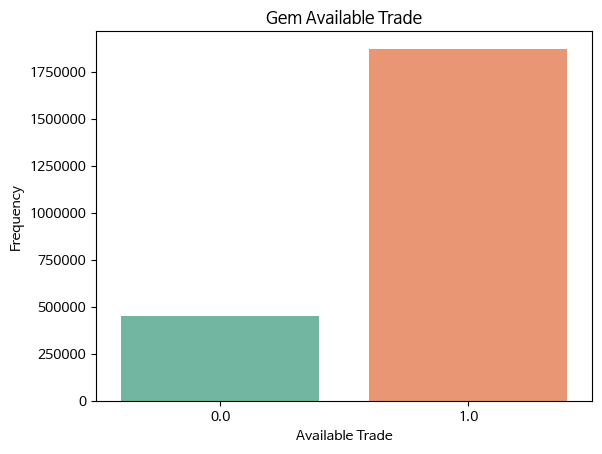

In [154]:
data = res['gem_availableTrade'].value_counts()
sns.barplot(x=data.index, y=data.values, palette = 'Set2')
plt.title('Gem Available Trade')
plt.xlabel("Available Trade")
plt.ylabel("Frequency")
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
plt.show()

## 1.2. 보석 등급

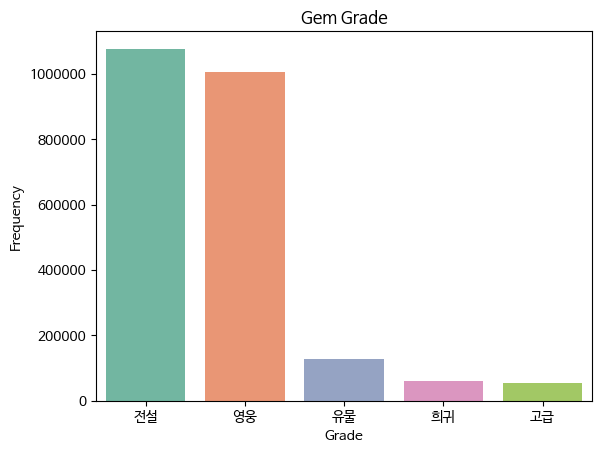

In [155]:
data = res['gem_grade'].value_counts()
sns.barplot(x=data.index, y=data.values, palette = 'Set2')
plt.title('Gem Grade')
plt.xlabel("Grade")
plt.ylabel("Frequency")
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
plt.show()

## 1.3. 보석 레벨

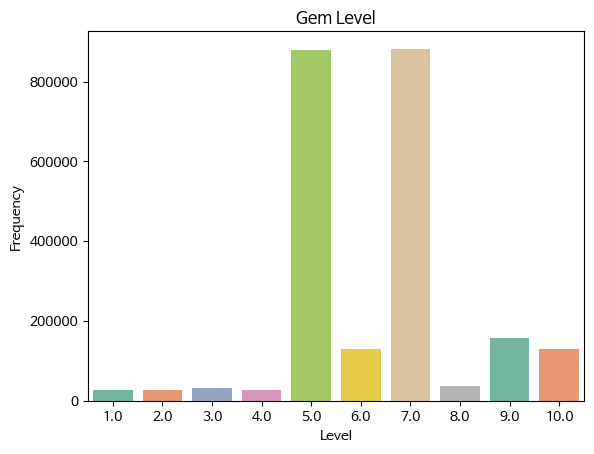

In [156]:
data = res['gem_level'].value_counts()
sns.barplot(x=data.index, y=data.values, palette = 'Set2')
plt.title('Gem Level')
plt.xlabel("Level")
plt.ylabel("Frequency")
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
plt.show()
# 5, 7레벨이 압도적

## 1.4. 보석 티어

<function matplotlib.pyplot.show(close=None, block=None)>

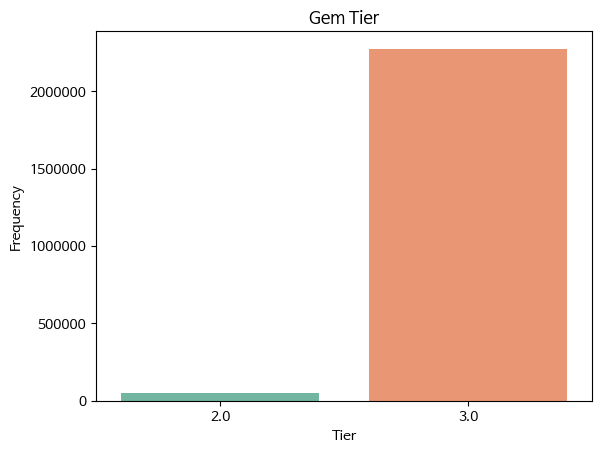

In [157]:
data = res['gem_tier'].value_counts()
sns.barplot(x=data.index, y=data.values, palette = 'Set2')
plt.title('Gem Tier')
plt.xlabel("Tier")
plt.ylabel("Frequency")
plt.ticklabel_format(axis='y', useOffset=False, style='plain')
plt.show

## 1.5. 보석 스킬 명

특정 직업에 특정 스킬의 보석이 많다는 것은 각인, 세팅 불문하고 필수 채용 스킬?

멸화, 홍염 구분해서도 진행

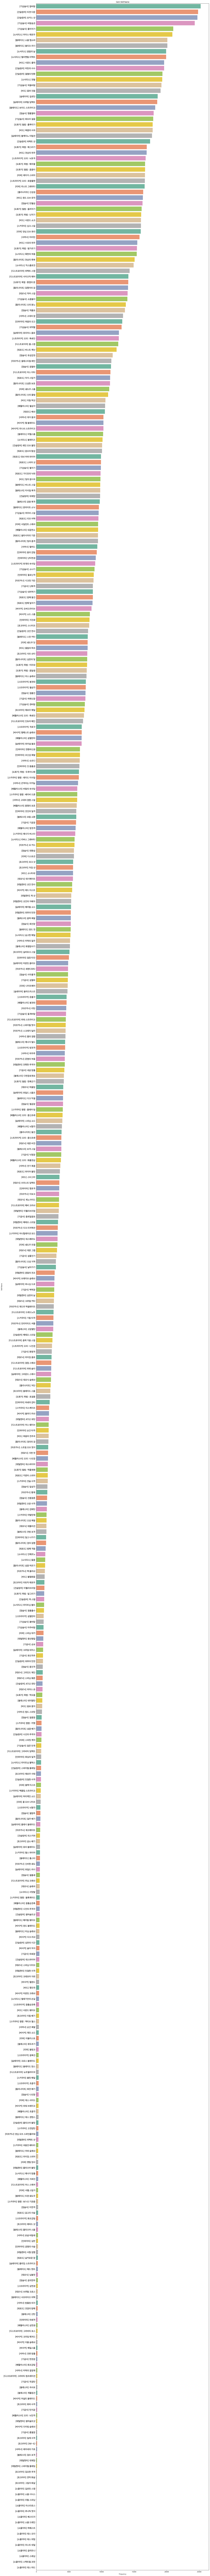

In [158]:
plt.figure(figsize=(20, 300))
data = res['gem_skillName'].value_counts()
sns.barplot(y=data.index, x=data.values, palette = 'Set2', orient='h')
plt.title('Gem Skill Name')
plt.ylabel("Skill Name")
plt.xlabel("Frequency")
plt.yticks(fontsize=14)
plt.show()

## 1.5.1. 멸화 스킬명

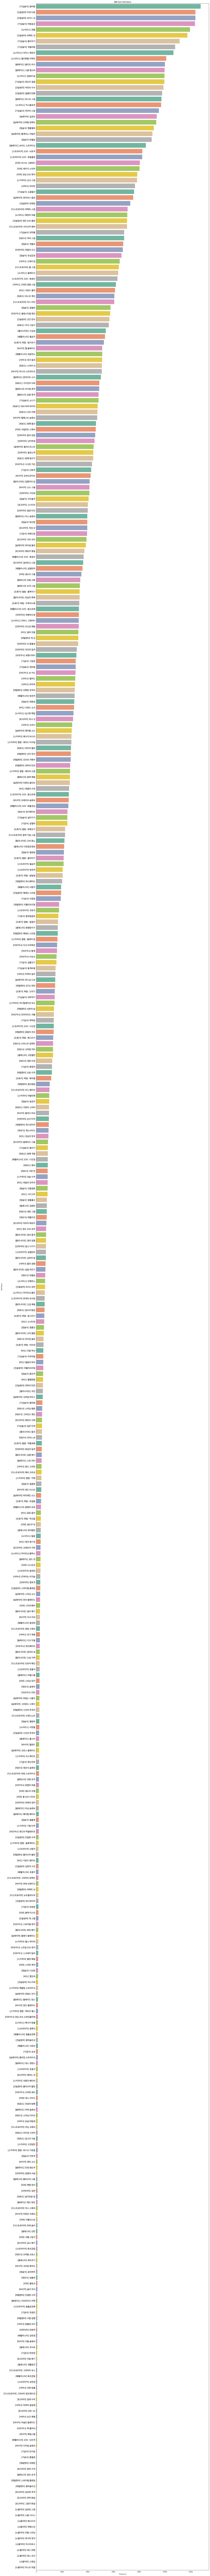

In [159]:
plt.figure(figsize=(20, 300))
data = res[res['gem_type']=='멸화']['gem_skillName'].value_counts()
sns.barplot(y=data.index, x=data.values, palette = 'Set2', orient='h')
plt.title("멸화 Gem Skill Name")
plt.ylabel("Skill Name")
plt.xlabel("Frequency")
plt.yticks(fontsize=14)
plt.show()
# 딜러 많음

## 1.5.2. 홍염 스킬 명

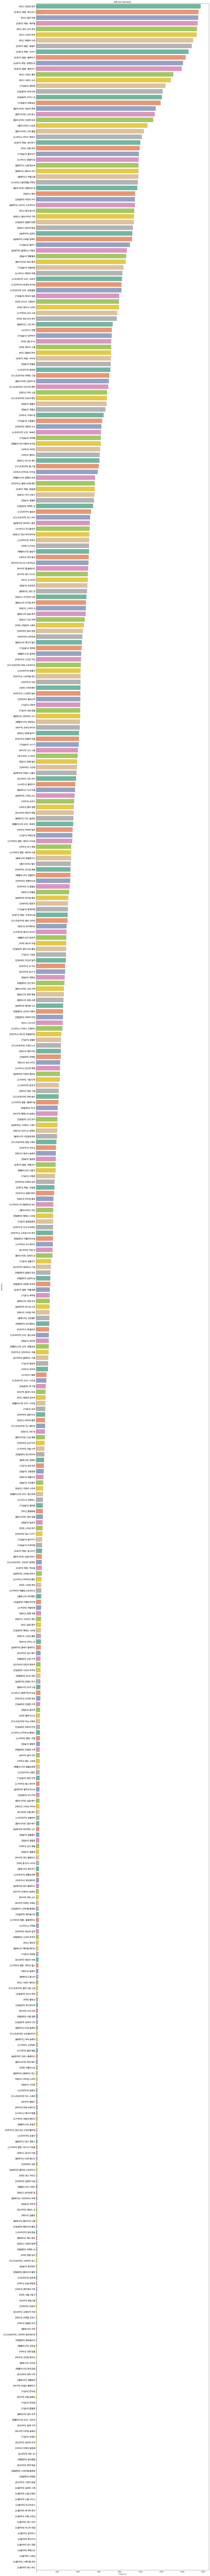

In [160]:
plt.figure(figsize=(20, 300))
data = res[res['gem_type']=='홍염']['gem_skillName'].value_counts()
sns.barplot(y=data.index, x=data.values, palette = 'Set2', orient='h')
plt.title("홍염 Gem Skill Name")
plt.ylabel("Skill Name")
plt.xlabel("Frequency")
plt.yticks(fontsize=14)
plt.show()
# 서폿 많음

In [5]:
profile = lok.get_table_df('profile_table')
profile.head(2)

characterCode  expeditionLevel pvpGradeName  townLevel title  \
0              1              300          10단       70.0  None   
1              2                0         None        NaN  None   

  guildMemberGrade guildName  usingSkillPoint  totalSkillPoint   지성   담력   매력  \
0           일반 길드원       릴리움              416              420  656  693  604   
1             None      None                0                0    0    0    0   

    친절 serverName characterName  characterLevel characterClassName  \
0  553        실리안   그대는노란꽃의민들레다              60               스카우터   
1    0       None           졔댜이               1             스페셜리스트   

  itemAvgLevel itemMaxLevel  
0      1385.00      1385.00  
1         0.00         0.00

In [8]:
gemdf = pd.merge(df, profile, how='inner', on='characterCode')
gemdf.head(2)

characterCode  gem1_availableTrade gem1_grade  gem1_level  \
0              1                    1         고급           1   
1              4                    1         전설           7   

         gem1_skillName  gem1_tier gem1_type  gem2_availableTrade gem2_grade  \
0  [스카우터] 명령 : M143 기관총          3        멸화                  1.0         고급   
1        [블레이드] 페이탈 웨이브          3        홍염                  1.0         전설   

   gem2_level       gem2_skillName  gem2_tier gem2_type  gem3_availableTrade  \
0         1.0  [스카우터] 명령 : 레이드 미사일        3.0        멸화                  1.0   
1         7.0     [블레이드] 보이드 스트라이크        3.0        멸화                  1.0   

  gem3_grade  gem3_level gem3_skillName  gem3_tier gem3_type  \
0         고급         2.0   [스카우터] 기동 타격        3.0        홍염   
1         전설         9.0  [블레이드] 블리츠 러시        3.0        멸화   

   gem4_availableTrade gem4_grade  gem4_level gem4_skillName  gem4_tier  \
0                  1.0         고급         2.0   [스카우터] 이스케이프        3.0   
1                  1.0         전설         7.0  [블레이드] 소울 앱소버        3.0   

  gem4_type  gem5_availableTrade gem5_grade  gem5_level  gem5_skillName  \
0        홍염                  1.0         고급         2.0  [스카우터] 과충전 배터리   
1        홍염                  1.0         전설         9.0   [블레이드] 소울 앱소버   

   gem5_tier gem5_type  gem6_availableTrade gem6_grade  gem6_level  \
0        3.0        멸화                  1.0         고급         2.0   
1        3.0        멸화                  1.0         유물        10.0   

      gem6_skillName  gem6_tier gem6_type  gem7_availableTrade gem7_grade  \
0  [스카우터] 명령 : 블록케이드        3.0        홍염                  1.0         고급   
1        [블레이드] 마엘스톰        3.0        홍염                  1.0         전설   

   gem7_level      gem7_skillName  gem7_tier gem7_type  gem8_availableTrade  \
0         2.0  [스카우터] 명령 : 베이비 드론        3.0        멸화                  1.0   
1         9.0       [블레이드] 버스트 스킬        3.0        멸화                  1.0   

  gem8_grade  gem8_level  gem8_skillName  gem8_tier gem8_type  \
0         희귀         4.0  [스카우터] 에너지 버스터        3.0        홍염   
1         전설         7.0   [블레이드] 블리츠 러시        3.0        홍염   

   gem9_availableTrade gem9_grade  gem9_level gem9_skillName  gem9_tier  \
0                  NaN       None         NaN           None        NaN   
1                  1.0         전설         7.0   [블레이드] 다크 악셀        3.0   

  gem9_type  gem10_availableTrade gem10_grade  gem10_level   gem10_skillName  \
0      None                   NaN        None          NaN              None   
1        홍염                   1.0          전설          7.0  [블레이드] 보이드 스트라이크   

   gem10_tier gem10_type  gem11_availableTrade gem11_grade  gem11_level  \
0         NaN       None                   NaN        None          NaN   
1         3.0         홍염                   1.0          전설          7.0   

  gem11_skillName  gem11_tier gem11_type  expeditionLevel pvpGradeName  \
0            None         NaN       None              300          10단   
1   [블레이드] 어스 슬래쉬         3.0         홍염              300           9단   

   townLevel     title guildMemberGrade guildName  usingSkillPoint  \
0       70.0      None           일반 길드원       릴리움              416   
1       70.0  재미있는 소나벨           일반 길드원     음아리가또              416   

   totalSkillPoint   지성   담력   매력   친절 serverName characterName  \
0              420  656  693  604  553        실리안   그대는노란꽃의민들레다   
1              420  622  643  569  536         카단  요호2수210입장후우편   

   characterLevel characterClassName itemAvgLevel itemMaxLevel  
0              60               스카우터      1385.00      1385.00  
1              60               블레이드      1605.83      1605.83

In [17]:
from ipywidgets import interact, widgets

className = profile['characterClassName'].unique()
exclued = ['암살자', '스페셜리스트', '전사(남)', '무도가(여)', '헌터(남)',
         '마법사','전사(여)', '무도가(남)', '헌터(여)']
classNames = np.setdiff1d(className, exclued)

DD_className = widgets.Dropdown(
    options=classNames,
    value='버서커',
    description = 'Class: '
)

DD_gem = widgets.Dropdown(
    options=['멸화', '홍염'],
    value='멸화',
    description='Gem Name: '
)
res = pd.DataFrame()
cn = ''
def select_class(className):
    global res, cn
    cn = className
    class_df = gemdf[gemdf['characterClassName']==className]
    res['gem_level'] = pd.concat([class_df[f'gem{i}_level'] for i in range(1, 12)], ignore_index=True)
    res['gem_skillName'] = pd.concat([class_df[f'gem{i}_skillName'] for i in range(1, 12)], ignore_index=True)
    res['gem_type'] = pd.concat([class_df[f'gem{i}_type'] for i in range(1, 12)], ignore_index=True)
    res['gem_Name_and_Level'] = res['gem_skillName'] + ": Lv. "+ res['gem_level'].astype(str)

def show_gemName_by_class(gemName):
    plt.figure(figsize=(8, 12))
    data = res[res['gem_type']==gemName]['gem_Name_and_Level'].value_counts()
    data = data[data > 100]
    sns.barplot(y=data.index, x=data.values, palette = 'Set2', orient='h')
    plt.title(f"{cn} {gemName} Gem Skill Name and Level")
    plt.ylabel("Skill Name")
    plt.xlabel("Frequency")
    plt.show()
    
interact(select_class, className=DD_className)
interact(show_gemName_by_class, gemName=DD_gem)

interactive(children=(Dropdown(description='Class: ', index=10, options=('건슬링어', '기공사', '기상술사', '데모닉', '데빌헌터',…

interactive(children=(Dropdown(description='Gem Name: ', options=('멸화', '홍염'), value='멸화'), Output()), _dom_cl…

<function __main__.show_gemName_by_class(gemName)>